In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data =pd.read_csv("/train_data.csv")


In [6]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_Status
Y    422
N    192
Name: count, dtype: int64


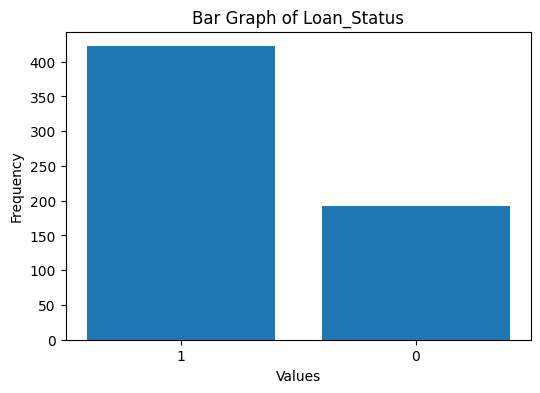

In [9]:
value_counts = data['Loan_Status'].value_counts()
print(value_counts)

plt.figure(figsize=(6, 4))
plt.bar(['1', '0'], value_counts.values)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Bar Graph of Loan_Status')
plt.show()

Preparing the Data

In [10]:
data.drop('Loan_ID', axis = 1, inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

columns_list = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

label_encoders = {}
for column in columns_list:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [13]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Handling Null Values

In [14]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column in columns_to_fill:
    median = data[column].median()
    data[column].fillna(median, inplace=True)

In [16]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


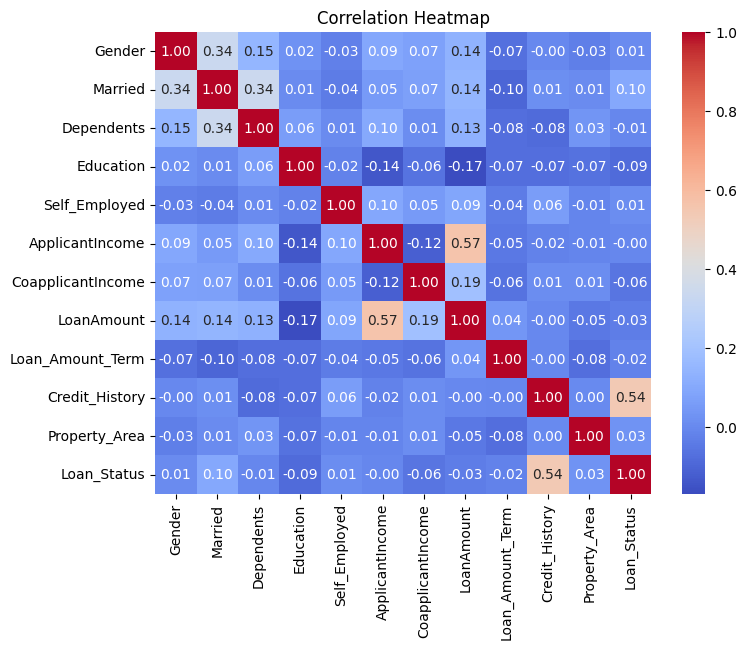

In [18]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
X = data.drop(['Loan_Status'], axis = 1)

In [20]:
Y = data['Loan_Status']

Feature Selection

In [21]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100)

rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='roc_auc')
rfecv.fit(X_train, Y_train)

selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

Selected features: Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


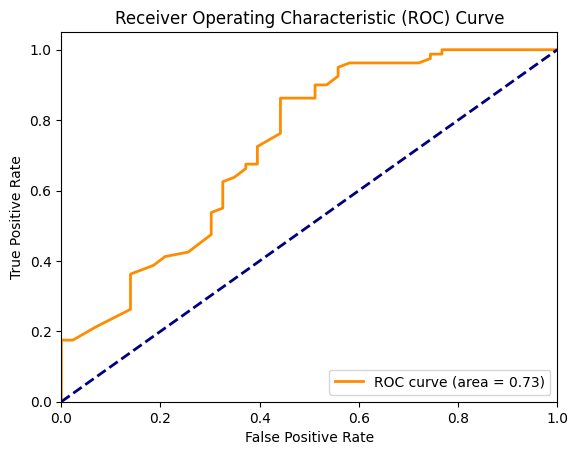

In [22]:
from sklearn.metrics import roc_curve, auc

y_score = rfecv.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
X_new = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [24]:
X_new.head(5)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,5849,0.0,128.0,360.0,1.0,2
1,1,4583,1508.0,128.0,360.0,1.0,0
2,0,3000,0.0,66.0,360.0,1.0,2
3,0,2583,2358.0,120.0,360.0,1.0,2
4,0,6000,0.0,141.0,360.0,1.0,2


Handling Outliers

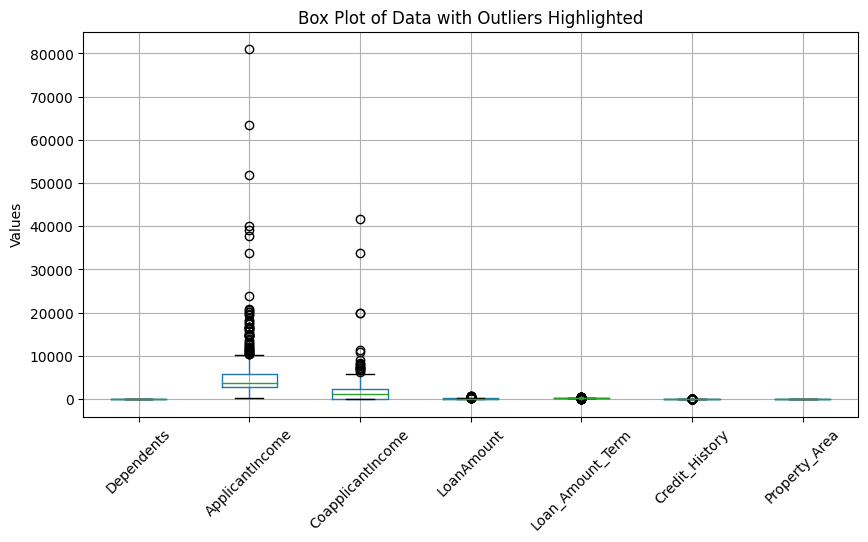

In [25]:
Q1 = X_new.quantile(0.25)
Q3 = X_new.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = (X_new < (Q1 - threshold * IQR)) | (X_new > (Q3 + threshold * IQR))

plt.figure(figsize=(10, 5))
X_new.boxplot()
plt.title("Box Plot of Data with Outliers Highlighted")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [26]:
cleaned_data = data[~outliers.any(axis=1)]

print("Cleaned Data without Outliers:")
cleaned_data

Cleaned Data without Outliers:


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,2,1,0,3987,1411.0,157.0,360.0,1.0,0,1
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


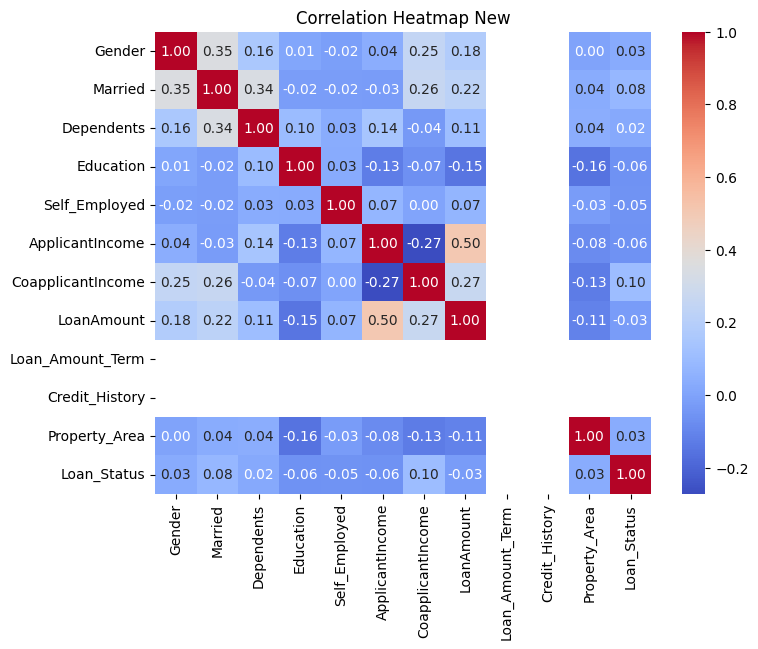

In [27]:
correlation_matrix_new = cleaned_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap New')
plt.show()

In [28]:
x = cleaned_data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = cleaned_data['Loan_Status']

Training the NaiveBayes Classifier Model

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

(80, 7) (316, 7) (80,) (316,)


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

y_pred_new = clf_nb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_new)
print("Accuracy:", accuracy)

Accuracy: 0.8


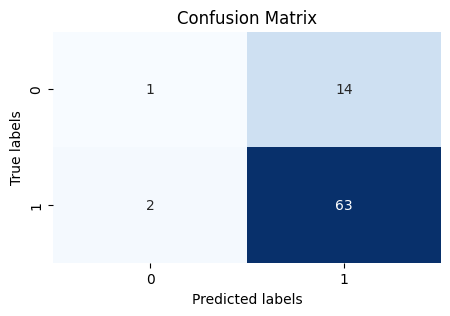

Accuracy: 0.8


In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_new)

plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print("Accuracy:", accuracy)